In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import wget

In [78]:
file = 'Parabolico.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    print('--File found---')
    Path_ = file

--File found---


In [79]:
g = 9.8

In [80]:
data = pd.read_csv(file)

In [81]:
x = np.linspace(data["X"][0],data["X"][2],100)

In [82]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

def Poly(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
        
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

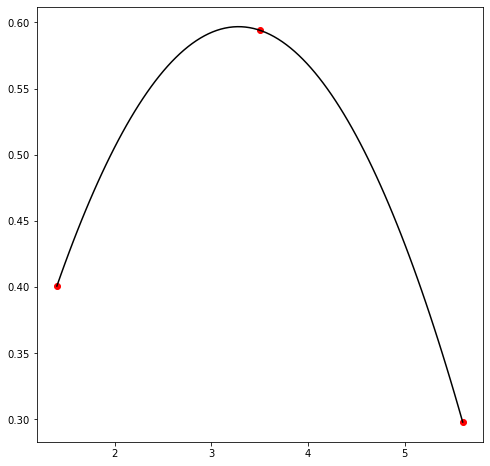

In [83]:
y = Poly(x,data["X"],data["Y"])

fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot()
ax1.scatter(data["X"],data["Y"],color="r")
ax1.plot(x,y,color="k")

In [84]:
x = sym.Symbol('x')
f = Poly(x,data["X"],data["Y"])
sf = sym.expand(f)
lf = sym.lambdify([x], sf, "numpy")

In [85]:
sf

-0.0554912422401579*x**2 + 0.363970234266202*x + 2.77555756156289e-17

$$ y = H + v_{0y}\frac{x}{v_{0x}}  - \frac{1}{2}g(\frac{x}{v_{0x}})^2 $$

$$ y = h + x \cdot tan(\theta_0)  - \frac{gx^2}{2v_0^2cos^2(\theta_0)} $$

Entonces:
$$ h = 2.77555756156289 \cdot 10^{-17} $$

$$ tan(\theta_0) = 0.363970234266202 $$

$$ \frac{g}{2v_0^2cos^2(\theta_0)} = 0.0554912422401579 $$

$$ v_{0}^2 = \frac{g}{2cos^2(\theta_0) \cdot 0.0554912422401579} $$

$$ v_{0} = \sqrt{\frac{g}{2cos^2(\theta_0) \cdot 0.0554912422401579}} $$

In [86]:
theta = sym.atan(0.363970234266202)

In [87]:
#Radianes
theta

0.349065850398866

In [88]:
#Grados
theta*180/np.pi

20.0000000000000

In [89]:
v_0 = np.sqrt(g/(2 * np.cos(0.349065850398866)**2 * 0.0554912422401579))

In [90]:
#m/s
v_0

10.000000000000004